<a href="https://colab.research.google.com/github/vinihora/portfolio_data_science/blob/main/extras/plotting_data_with_matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introdução**

Aprendendo a como utilizar o matplotlib.

Guias de aprendizados: Curso DSNP e [Real Python](https://realpython.com/python-matplotlib-guide/#understanding-pltsubplots-notation)



## Começando...

Importando as bibliotecas necessárias para a aplicação do código

In [1]:
# Importando as bibliotecas

import numpy as np
import matplotlib.pyplot as plt

# Plotando um gráfico simples com a biblioteca

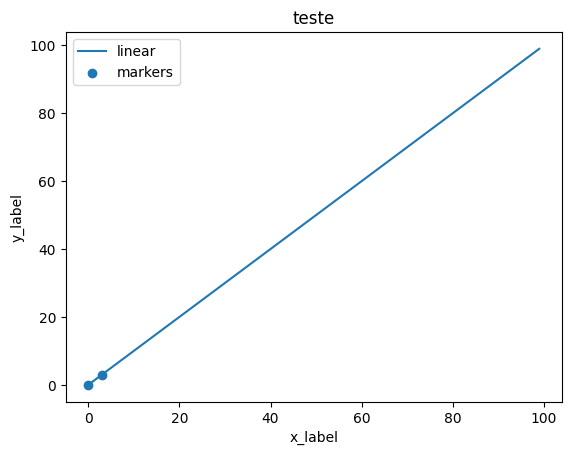

In [25]:
# Gerando uma base para utilizar nos gráfico
x = np.arange(0, 100)

# Criando um frame para colocar o gráfico
fig, ax = plt.subplots()

# Inserindo título
ax.set_title('teste')

# Criando o gráfico, indicando o eixo X e Y, e dando um nome a linha do gráfico
ax.plot(x, x, label="linear")

# Adicionando pontos no gráfico
ax.scatter([0,3], [0,3], label="markers")

# Adicionando o nome do eixo Y
ax.set_ylabel('y_label')

# Adicionando o nome do eixo X
ax.set_xlabel('x_label')

# Adicionando uma legenda ao gráfico
ax.legend()

# **Lidando com os elementos dos gráficos**

In [27]:
rng = np.arange(50)
rnd = np.random.randint(0, 10, size=(3, rng.size))
yrs = 1950 + rng

print(rng)
print(rnd)
print(yrs)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]
[[7 0 2 3 3 4 7 4 8 9 8 9 0 8 9 5 9 0 8 6 7 1 4 0 0 2 6 8 0 3 8 8 6 8 8 4
  6 7 7 5 5 6 0 8 1 8 9 9 6 7]
 [3 0 6 4 0 2 3 1 8 4 2 3 6 3 8 6 1 2 1 6 4 4 5 3 5 1 3 5 5 4 8 9 4 0 6 0
  5 4 2 5 0 7 1 6 0 8 8 6 0 5]
 [1 4 9 4 5 3 1 2 5 0 9 6 1 5 0 5 0 7 6 2 6 6 2 7 9 7 3 3 4 3 5 6 7 6 4 8
  3 1 4 0 4 6 3 1 0 7 5 9 2 6]]
[1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963
 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977
 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991
 1992 1993 1994 1995 1996 1997 1998 1999]


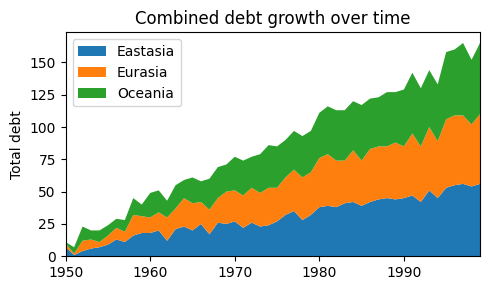

In [40]:
fig, ax = plt.subplots(figsize=(5,3))

# Tipo do gráfico a ser plotado
ax.stackplot(yrs, rng + rnd, labels=['Eastasia', 'Eurasia', 'Oceania'])

ax.set_title('Combined debt growth over time')
ax.legend(loc='upper left')
ax.set_ylabel('Total debt')

# Coloca o gráfico comecando do eixo 0 e terminando no ultimo valor, sem deixar espaços entre o fim e o começo do gráfico
ax.set_xlim(xmin=yrs[0], xmax=yrs[-1])

# Tira o padding do gráfico (espaçamento)
fig.tight_layout()

# **Plotando 2 gráficos em uma mesma figura**

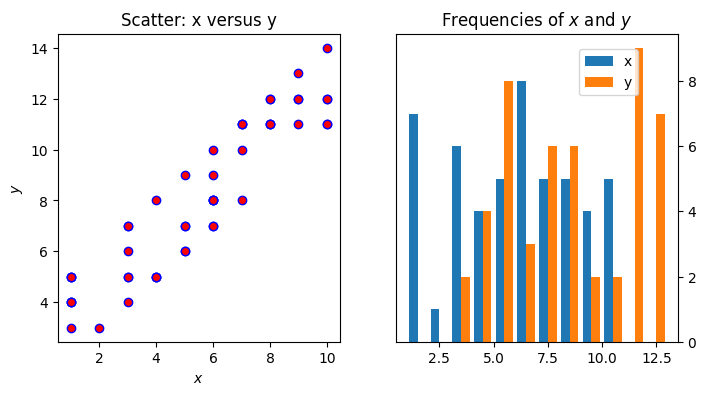

In [74]:
x = np.random.randint(low=1, high=11, size=50)
y = x + np.random.randint(1,5, size=x.size)
data = np.column_stack((x,y))

# nrows = numero de linhas, ncols = numero de colunas
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8,4))

#marker = tipo de marcação no gráfico, c = color , edgecolor = cor da borda ('b' = blue, 'g' = green, etc)
ax1.scatter(x=x, y=y, marker='o', c='r', edgecolor='b')

ax1.set_title('Scatter: x versus y')
ax1.set_xlabel('$x$')
ax1.set_ylabel('$y$')

ax2.hist(data, bins=np.arange(data.min(), data.max()), label=('x', 'y'))

# Muda a localização das legendas
ax2.legend(loc=(0.65, 0.8))

ax2.set_title('Frequencies of $x$ and $y$')

# Move o eixo Y para o lado direito da imagem
ax2.yaxis.tick_right()


# **Plotando códigos com grid's (2,2)**

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(7,7))
ax1, ax2, ax3, ax4 = ax.flatten() # Transforma de 2d para 1d

Agora, vamos importar alguns dados para trabalhar com um número maior de informações, a fim de lidar com plots mais complexos.

In [77]:
from io import BytesIO
import tarfile
from urllib.request import urlopen

url = 'http://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.tgz'
b = BytesIO(urlopen(url).read())
fpath = 'CaliforniaHousing/cal_housing.data'

In [78]:
with tarfile.open(mode='r', fileobj=b) as archive:
  housing = np.loadtxt(archive.extractfile(fpath), delimiter=',')

In [101]:
# Coletando somente os dados que serão utilizados no exercício

y = housing[:, -1]
pop, age = housing[:, [4, 7]].T

In [111]:
# Criando uma func para adicionar um subtítulo ao gráfico
def add_titlebox(ax, text):
  ax.text(.55, .8, text, horizontalalignment='center', transform=ax.transAxes, bbox=dict(facecolor='white', alpha=0.6), fontsize=12.5)
  return ax

<Axes: >

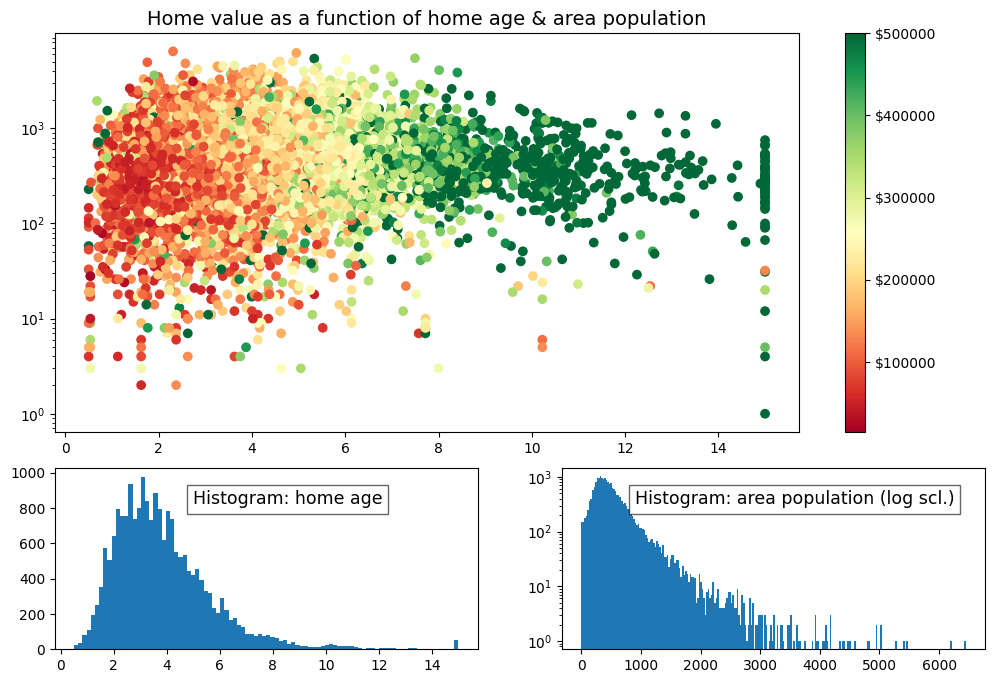

In [112]:
gridsize= (3, 2)
fig = plt.figure(figsize=(12,8))
ax1 = plt.subplot2grid(gridsize, (0,0), colspan=2, rowspan=2)
ax2 = plt.subplot2grid(gridsize,(2, 0))
ax3 = plt.subplot2grid(gridsize, (2,1))

ax1.set_title('Home value as a function of home age & area population', fontsize=14);
sctr = ax1.scatter(x=age, y=pop, c=y, cmap='RdYlGn');
plt.colorbar(sctr, ax=ax1, format='$%d');
ax1.set_yscale('log');
ax2.hist(age, bins='auto');
ax3.hist(pop, bins='auto', log=True);

add_titlebox(ax2, 'Histogram: home age')
add_titlebox(ax3, 'Histogram: area population (log scl.)')